In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
FCM = pd.read_csv("Desktop/Juypter/FuelConsumption.csv")

# take a look at the dataset
FCM.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
FCM.describe(include='all')

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067,1067,1067,1067.000000,1067.000000,1067,1067,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
unique,NaN,39,663,16,NaN,NaN,22,4,NaN,NaN,NaN,NaN,NaN
top,NaN,FORD,F150 FFV,MID-SIZE,NaN,NaN,A6,X,NaN,NaN,NaN,NaN,NaN
freq,NaN,90,8,178,NaN,NaN,222,514,NaN,NaN,NaN,NaN,NaN
mean,2014.0,NaN,NaN,NaN,3.346298,5.794752,NaN,NaN,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,NaN,NaN,NaN,1.415895,1.797447,NaN,NaN,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,NaN,NaN,NaN,2.000000,4.000000,NaN,NaN,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,NaN,NaN,NaN,3.400000,6.000000,NaN,NaN,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,NaN,NaN,NaN,4.300000,8.000000,NaN,NaN,15.550000,10.850000,13.350000,31.000000,294.000000


In [4]:
FCM.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [5]:
FCM.nunique()

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [7]:
FCM.FUELTYPE.unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [14]:
FCM

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [37]:
FCM_1=FCM[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','FUELTYPE']].values
FCM_1[0:5]

array([[2.0, 4, 8.5, 196, 'Z'],
       [2.4, 4, 9.6, 221, 'Z'],
       [1.5, 4, 5.9, 136, 'Z'],
       [3.5, 6, 11.1, 255, 'Z'],
       [3.5, 6, 10.6, 244, 'Z']], dtype=object)

In [38]:
from sklearn import preprocessing 
le_fueltype=preprocessing.LabelEncoder()
le_fueltype.fit(['Z', 'D', 'X', 'E'])
FCM_1[:,4]=le_fueltype.transform(FCM_1[:,4])
FCM_1[0:15]

array([[2.0, 4, 8.5, 196, 3],
       [2.4, 4, 9.6, 221, 3],
       [1.5, 4, 5.9, 136, 3],
       [3.5, 6, 11.1, 255, 3],
       [3.5, 6, 10.6, 244, 3],
       [3.5, 6, 10.0, 230, 3],
       [3.5, 6, 10.1, 232, 3],
       [3.7, 6, 11.1, 255, 3],
       [3.7, 6, 11.6, 267, 3],
       [2.4, 4, 9.2, 212, 3],
       [2.4, 4, 9.8, 225, 3],
       [3.5, 6, 10.4, 239, 3],
       [5.9, 12, 15.6, 359, 3],
       [5.9, 12, 15.6, 359, 3],
       [4.7, 8, 14.7, 338, 3]], dtype=object)

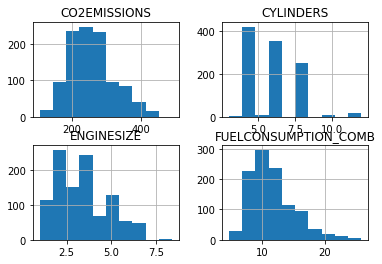

In [28]:
viz = FCM[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB','FUELTYPE']]
viz.hist()
plt.show()

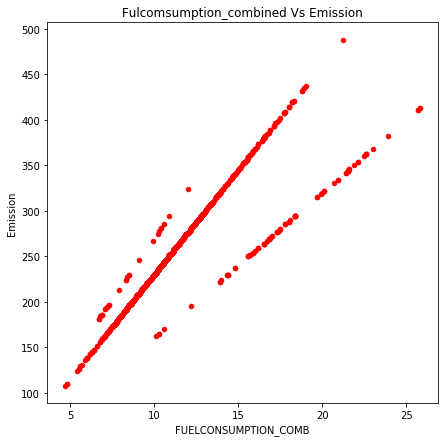

In [30]:
FCM[FCM['FUELCONSUMPTION_COMB']<31].plot.scatter(x="FUELCONSUMPTION_COMB",y="CO2EMISSIONS",title="Fulcomsumption_combined Vs Emission",fontsize=10,color='red',figsize=(7,7))
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

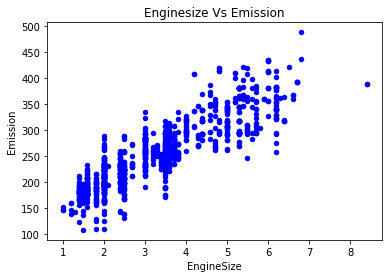

In [42]:
FCM[FCM['ENGINESIZE']<10].plot.scatter(x="ENGINESIZE",y="CO2EMISSIONS",title="Enginesize Vs Emission",fontsize=10,color='blue')
plt.xlabel("EngineSize")
plt.ylabel("Emission")
plt.show()

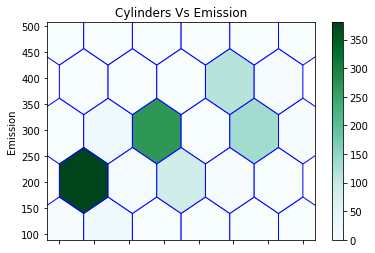

In [41]:
FCM[FCM['CYLINDERS']<12].plot.hexbin(x="CYLINDERS",y="CO2EMISSIONS",title="Cylinders Vs Emission",gridsize=5,fontsize=10,color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

In [54]:
msk = np.random.rand(len(FCM)) < 0.8
train = FCM[msk]
test = FCM[~msk]

In [58]:
msk_6=np.random.rand(len(FCM))<0.6
train_6=FCM[msk_6]
test_6=FCM[~msk_6]

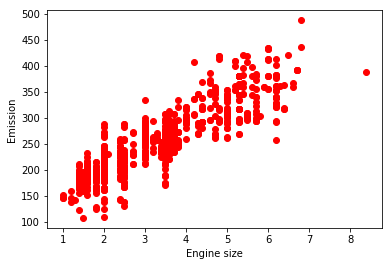

In [55]:
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='red')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

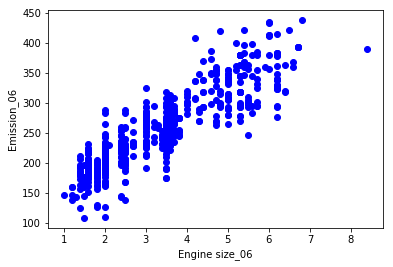

In [59]:
plt.scatter(train_6.ENGINESIZE,train_6.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size_06")
plt.ylabel("Emission_06")
plt.show()

In [63]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
train_x=np.asanyarray(train[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']])
train_y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print('Coefficients:',regr.coef_)
print('Intercept:',regr.intercept_)

Coefficients: [[11.67850053  7.02047349  9.62915865]]
Intercept: [65.23944188]


In [69]:
from sklearn.linear_model import LinearRegression
regr_6=LinearRegression()
train_6x=np.asanyarray(train_6[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB']])
train_6y=np.asanyarray(train_6[['CO2EMISSIONS']])
regr_6.fit(train_6x,train_6y)
#the coefficients
print('Coefficients:',regr_6.coef_)
print('Intercept:',regr_6.intercept_)


Coefficients: [[12.14018819  7.26466364  9.19965161]]
Intercept: [65.9831523]


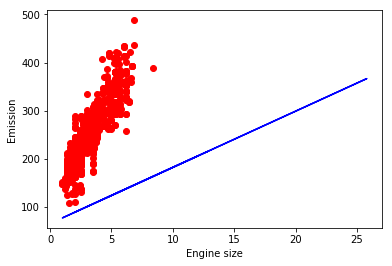

In [73]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='red')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0],color='blue')
#plotting linear regression 
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [65]:
from sklearn.metrics import r2_score
test_x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_y=np.asanyarray(test[['CO2EMISSIONS']])
test_y_=regr.predict(test_x)
print("Mean absolute error: %.2f"%np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares(MSE):%.2f"%np.mean((test_y_ -test_y)**2))
print("R2-score:%.2f"% r2_score(test_y_ ,test_y))

Mean absolute error: 16.22
Residual sum of squares(MSE):516.26
R2-score:0.84


In [72]:
from sklearn.metrics import r2_score
test_6x=np.asanyarray(test_6[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
test_6y=np.asanyarray(test_6[['CO2EMISSIONS']])
test_6y_=regr_6.predict(test_6x)
print("Mean absolute error:%.2f"%np.mean(np.absolute(test_6y_ - test_6y)))
print("Residual sum of squares(MSE):%.2f"%np.mean((test_6y_- test_6y)**2))
print("R2-score:%.2f"%r2_score(test_6y_,test_6y))

Mean absolute error:16.72
Residual sum of squares(MSE):528.83
R2-score:0.84


In [ ]:
#notes for above Data set
<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

# <center>Simple Linear Regression</center>


#### About this Notebook
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, 
and finally use model to predict unknown value
##understanding Dataset 


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

### Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the independent x in the dataset, and the dependent y by the linear approximation. 

As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.

#### Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set: 
    - Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
    - Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
    - Root Mean Squared Error (RMSE).
    - R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).
